In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/saura/OneDrive/Desktop/Programming/data/train.csv')

In [3]:
df.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0            1         0       3    male  22.0      1      0   7.2500
1            2         1       1  female  38.0      1      0  71.2833
2            3         1       3  female  26.0      0      0   7.9250
3            4         1       1  female  35.0      1      0  53.1000
4            5         0       3    male  35.0      0      0   8.0500

In [4]:
df.drop("PassengerId", axis=1, inplace = True)


In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         131
SibSp         0
Parch         0
Fare          0
dtype: int64

In [6]:
df["Age"].fillna(df["Age"].median(skipna=True),inplace=True)

In [7]:
df.head(7)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500
5         0       3    male  28.0      0      0   8.4583
6         0       1    male  54.0      0      0  51.8625

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [9]:
df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  620.000000  620.000000  620.000000  620.000000  620.000000  620.000000
mean     0.393548    2.309677   29.404839    0.538710    0.382258   31.746982
std      0.488931    0.833993   12.810898    1.086018    0.792131   45.907139
min      0.000000    1.000000    0.750000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.925000
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.750000
75%      1.000000    3.000000   35.000000    1.000000    0.000000   30.548950
max      1.000000    3.000000   71.000000    8.000000    5.000000  512.329200

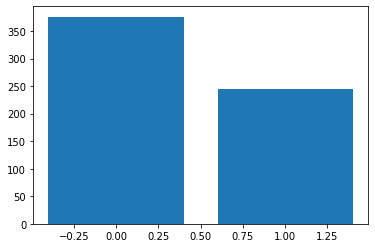

0    376
1    244
Name: Survived, dtype: int64

In [10]:
counts = df["Survived"].value_counts()
plt.bar(counts.index, counts.values)
plt.show()
df['Survived'].value_counts()

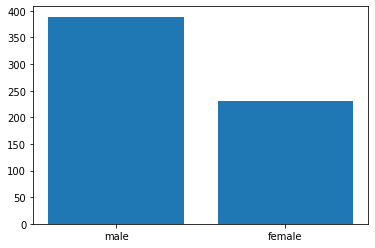

male      389
female    231
Name: Sex, dtype: int64

In [11]:
counts = df["Sex"].value_counts()
plt.bar(counts.index, counts.values)
plt.show()
df['Sex'].value_counts()

Sex  Survived
0  female  0.748918
1    male  0.182519

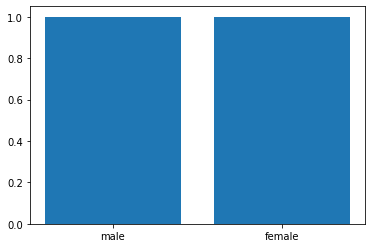

In [12]:
plt.bar(x='Sex',height='Survived',data=df)
df.groupby('Sex',as_index=False).Survived.mean()

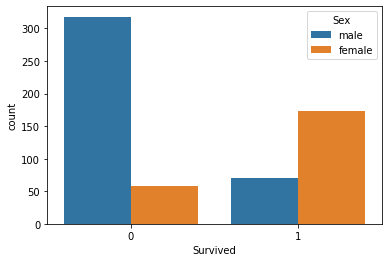

In [13]:
sns.countplot(x='Survived', hue='Sex', data=df)

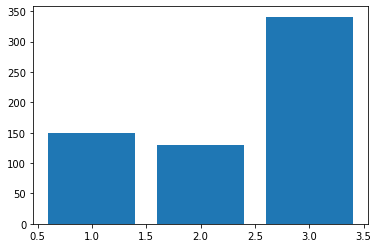

3    341
1    149
2    130
Name: Pclass, dtype: int64

In [14]:
counts = df["Pclass"].value_counts()
plt.bar(counts.index, counts.values)
plt.show()
df['Pclass'].value_counts()

Pclass  Survived
0       1  0.597315
1       2  0.515385
2       3  0.258065

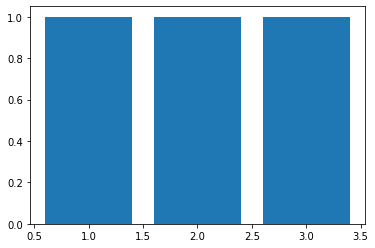

In [15]:
plt.bar(x='Pclass',height='Survived',data=df)
df.groupby('Pclass',as_index=False).Survived.mean()

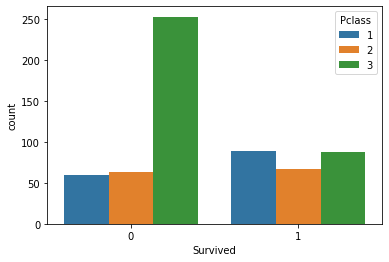

In [16]:
sns.countplot(x='Survived', hue='Pclass', data=df)

28.0

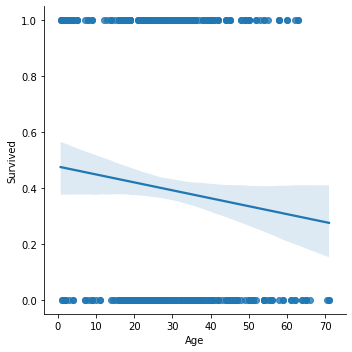

In [17]:
sns.lmplot(x='Age',y='Survived',data=df)
df.Age.median()

In [18]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500

In [19]:
df = df.replace(to_replace ="male",
                 value ="1")


In [20]:
df = df.replace(to_replace ="female",
                 value ="0")

In [21]:
df.head()

Survived  Pclass Sex   Age  SibSp  Parch     Fare
0         0       3   1  22.0      1      0   7.2500
1         1       1   0  38.0      1      0  71.2833
2         1       3   0  26.0      0      0   7.9250
3         1       1   0  35.0      1      0  53.1000
4         0       3   1  35.0      0      0   8.0500

In [22]:
df["Sex"]=df["Sex"].astype(int)

In [23]:
test = df.sample(120)
train = df[~df.isin(test)]
train.dropna(inplace = True)

Int64Index([256, 533, 169, 433, 410, 442, 135,  49, 460,  44,
            ...
            484,  79, 107, 451, 217, 201, 273, 554, 315,   0],
           dtype='int64', length=120)

In [24]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [25]:
def square_loss(y_pred, target):
  return np.mean(pow((y_pred - target),2))

In [26]:
X_tr = train.drop('Survived', 1) #x-train
Y_tr = np.array(train.Survived).reshape(500,1) #y-train

In [27]:
X_te = test.drop('Survived', 1) #x-test
Y_te = np.array(test.Survived).reshape(120,1) #y-test

In [28]:
lr = 0.01 #learning late
W = np.random.uniform(0,1) 
b = 0.1

In [29]:
for i in range(500):
    z = np.dot(X_tr, W) + b
    Y_pred = sigmoid(z)
    l = square_loss(Y_pred, Y_tr)
    gradient_W = np.dot((Y_pred-Y_tr).T, X_tr)/X_tr.shape[0]
    gradient_b = np.mean(Y_pred-Y_tr)
    W = W - lr * gradient_W
    b = b - lr* gradient_b

C:\Users\saura\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [ ]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_te, Y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(Y_te, Y_pred))

In [30]:
for i in range(len(X_te)):
    r = sigmoid(np.dot(X_te, W) + b)
    print(r)

C:\Users\saura\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[1.28580312e-004 1.00000000e+000 0.00000000e+000 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999999e-001 1.00000000e+000 6.55396798e-140 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [8.73040196e-001 1.00000000e+000 0.00000000e+000 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999844e-001 9.99999989e-001 3.23543084e-040 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 2.32081272e-011 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 6.64812609e-029 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999998e-001 1.00000000e+000 6.87257878e-078 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99979645e-001 1.00000000e+000 2.63826121e-125 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 2.38882871e-084 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999994e-001 9.99999998e-001 4.15589639e-031 1.00000000e+000
  1.00000000e+000 1.00000

[[1.28580312e-004 1.00000000e+000 0.00000000e+000 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999999e-001 1.00000000e+000 6.55396798e-140 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [8.73040196e-001 1.00000000e+000 0.00000000e+000 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999844e-001 9.99999989e-001 3.23543084e-040 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 2.32081272e-011 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 6.64812609e-029 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999998e-001 1.00000000e+000 6.87257878e-078 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99979645e-001 1.00000000e+000 2.63826121e-125 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 2.38882871e-084 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999994e-001 9.99999998e-001 4.15589639e-031 1.00000000e+000
  1.00000000e+000 1.00000

[[1.28580312e-004 1.00000000e+000 0.00000000e+000 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999999e-001 1.00000000e+000 6.55396798e-140 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [8.73040196e-001 1.00000000e+000 0.00000000e+000 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999844e-001 9.99999989e-001 3.23543084e-040 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 2.32081272e-011 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 6.64812609e-029 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999998e-001 1.00000000e+000 6.87257878e-078 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99979645e-001 1.00000000e+000 2.63826121e-125 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 2.38882871e-084 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999994e-001 9.99999998e-001 4.15589639e-031 1.00000000e+000
  1.00000000e+000 1.00000

[[1.28580312e-004 1.00000000e+000 0.00000000e+000 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999999e-001 1.00000000e+000 6.55396798e-140 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [8.73040196e-001 1.00000000e+000 0.00000000e+000 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999844e-001 9.99999989e-001 3.23543084e-040 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 2.32081272e-011 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 6.64812609e-029 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999998e-001 1.00000000e+000 6.87257878e-078 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99979645e-001 1.00000000e+000 2.63826121e-125 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 2.38882871e-084 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999994e-001 9.99999998e-001 4.15589639e-031 1.00000000e+000
  1.00000000e+000 1.00000

[[1.28580312e-004 1.00000000e+000 0.00000000e+000 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999999e-001 1.00000000e+000 6.55396798e-140 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [8.73040196e-001 1.00000000e+000 0.00000000e+000 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999844e-001 9.99999989e-001 3.23543084e-040 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 2.32081272e-011 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 6.64812609e-029 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999998e-001 1.00000000e+000 6.87257878e-078 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99979645e-001 1.00000000e+000 2.63826121e-125 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 2.38882871e-084 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [9.99999994e-001 9.99999998e-001 4.15589639e-031 1.00000000e+000
  1.00000000e+000 1.00000

In [35]:
df_test = pd.read_csv('C:/Users/saura/OneDrive/Desktop/Programming/data/test.csv')

In [36]:
df_test.drop("PassengerId", axis=1, inplace = True)

In [37]:
df_test.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         46
SibSp        0
Parch        0
Fare         0
dtype: int64

In [38]:
df_test["Age"].fillna(df_test["Age"].median(skipna=True),inplace=True)

In [39]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [40]:
df_test = df_test.replace(to_replace ="male",
                 value ="1")


In [41]:
df_test = df_test.replace(to_replace ="female",
                 value ="0")

In [42]:
df_test["Sex"]=df_test["Sex"].astype(int)

In [45]:
X = df_test.drop('Survived', 1) #x-test
Y = np.array(df_test.Survived).reshape(271,1) #y-test

In [ ]:
for i in range(len(X_te)):
    Y_pred = sigmoid(np.dot(X_te, W) + b)
    print(Y_pred)
    

In [ ]:

matrix = confusion_matrix(Y, Y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(Y, Y_pred))